In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [24]:
dataset_train = pd.read_csv("data/SalesTrain.csv")

dataset_train.shape

(96, 1)

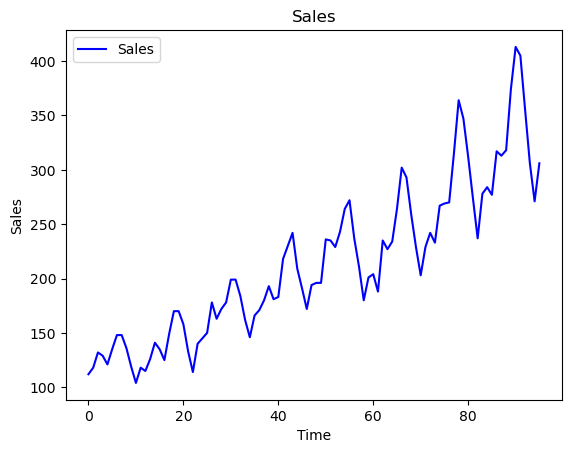

In [25]:
plt.plot(dataset_train, color="blue", label="Sales")
plt.title("Sales")
plt.xlabel("Time")
plt.ylabel("Sales")
plt.legend()
plt.show()

In [26]:
sc = MinMaxScaler(feature_range=(0, 1))

training_set_scaled = sc.fit_transform(dataset_train)

In [27]:
X_train = []
y_train = []

for i in range(90, len(training_set_scaled)):
    data = training_set_scaled[i - 90 : i, 0]
    X_train.append(data)
    y_train.append(training_set_scaled[i, 0])

X_train = np.array(X_train).reshape(-1, 90, 1)
y_train = np.array(y_train)

In [28]:
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=100))
model.add(Dropout(0.2))
model.add(Dense(units=1))

/opt/conda/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [29]:
model.compile(optimizer="adam", loss="mean_squared_error")

model.fit(X_train, y_train, epochs=300, batch_size=1)

Epoch 1/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - loss: 0.3138
Epoch 2/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - loss: 0.0860
Epoch 3/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - loss: 0.0698
Epoch 4/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 0.0281
Epoch 5/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - loss: 0.0328
Epoch 6/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - loss: 0.0631
Epoch 7/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - loss: 0.0285
Epoch 8/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 0.0642
Epoch 9/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - loss: 0.0693
Epoch 10/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - loss: 0.0833
Epoch 11/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - loss: 0.0401
Epoch 12/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - loss: 0.0490
Epoch 13/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 0.0423
Epoch 14/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 0.0713
Epoch 15/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - loss: 0.0545
Epoch 16/300

In [30]:
dataset_test = pd.read_csv("data/SalesTest.csv")

dataset_test.shape

(48, 1)

In [31]:
train_values = dataset_train["data"].values
test_values = dataset_test["data"].values
total_values = np.concatenate((train_values, test_values), axis=0)

time_index = np.arange(len(total_values))

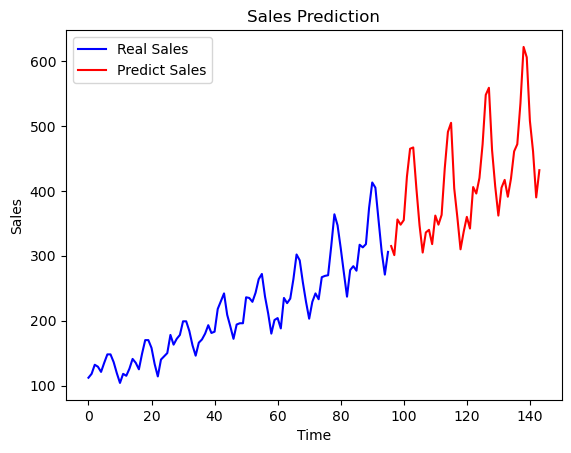

In [32]:
plt.plot(
    time_index[: len(train_values)], train_values, color="blue", label="Real Sales"
)

plt.plot(time_index[len(train_values) :], test_values, color="red", label="Predict Sales")

plt.title("Sales Prediction")
plt.xlabel("Time")
plt.ylabel("Sales")
plt.legend()
plt.show()

In [33]:
dataset_test_anomalies = dataset_test.copy()

dataset_test_anomalies.loc[:9, 'data'] = 90
dataset_test_anomalies.loc[10:34,'data'] = np.random.uniform(100, 200, 25)
dataset_test_anomalies.loc[35:,'data'] = 90

/tmp/ipykernel_707/1836582313.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[149.61234968 114.99118551 176.96043533 156.75064636 136.95082021
 102.10873739 194.96684257 163.36350505 161.43208282 108.30849644
 158.4667486  162.21065641 157.02740123 152.77504646 138.95542275
 125.15280638 151.41068074 143.13827496 173.35454491 179.11332153
 182.44575313 187.57296573 129.57617203 170.76915084 147.72004083]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataset_test_anomalies.loc[10:34,'data'] = np.random.uniform(100, 200, 25)


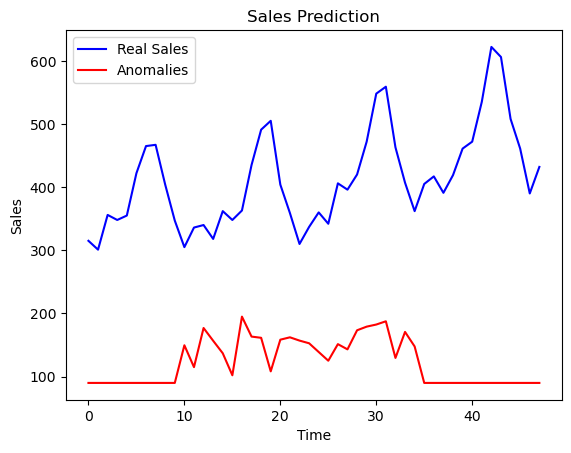

In [34]:
plt.plot(dataset_test, color="blue", label="Real Sales")
plt.plot(dataset_test_anomalies, color="red", label="Anomalies")
plt.title("Sales Prediction")
plt.xlabel("Time")
plt.ylabel("Sales")
plt.legend()
plt.show()

In [35]:
dataset_total = pd.concat((dataset_train["data"], dataset_test["data"]), axis=0)

inputs = dataset_total[len(dataset_total) - len(dataset_test) - 90 :].values

inputs = pd.DataFrame(inputs, columns=["data"])

inputs = sc.transform(inputs)

In [36]:
dataset_total_anomalies = pd.concat((dataset_train["data"], dataset_test_anomalies["data"]), axis=0)

inputs_anomalies = dataset_total_anomalies[len(dataset_total_anomalies) - len(dataset_test) - 90 :].values

inputs_anomalies = pd.DataFrame(inputs_anomalies, columns=["data"])

inputs_anomalies = sc.transform(inputs_anomalies)

In [37]:
X_test = []

X_test_anomalies = []

for i in range(90, len(inputs)):
    data = inputs[i - 90 : i, 0]
    X_test.append(data)
    X_test_anomalies.append(inputs_anomalies[i - 90 : i, 0])

X_test, X_test_anomalies = np.array(X_test), np.array(X_test_anomalies)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

X_test_anomalies = np.reshape(X_test_anomalies, (X_test_anomalies.shape[0], X_test_anomalies.shape[1], 1))

In [38]:
predicted_sales = model.predict(X_test)

predicted_sales = sc.inverse_transform(predicted_sales)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 431ms/step


In [39]:
predicted_sales_anomalies = model.predict(X_test_anomalies)

predicted_sales_anomalies = sc.inverse_transform(predicted_sales_anomalies)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


In [40]:
mes_test = mean_squared_error(test_values, predicted_sales)

mes_test_anomalies = mean_squared_error(test_values, predicted_sales_anomalies)

In [41]:
print("MSE Test: ", mes_test)

print("MSE Test Anomalies: ", mes_test_anomalies)

MSE Test:  4392.403097317379
MSE Test Anomalies:  14138.835796520667


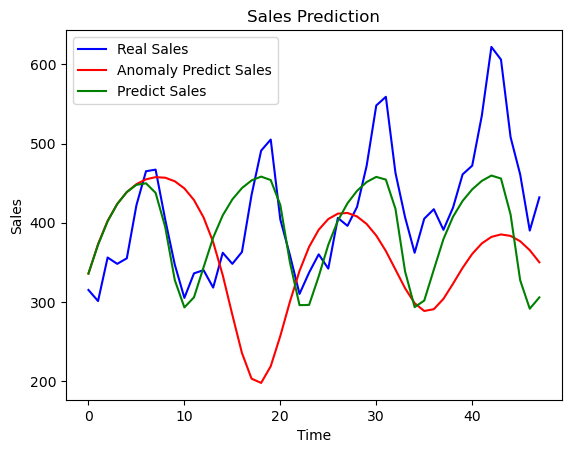

In [42]:
plt.plot(test_values, color="blue", label="Real Sales")

plt.plot(predicted_sales_anomalies, color="red", label="Anomaly Predict Sales")

plt.plot(predicted_sales, color="green", label="Predict Sales")

plt.title("Sales Prediction")

plt.xlabel("Time")

plt.ylabel("Sales")

plt.legend()

plt.show()